This notebooks provides a snapshot of runoff input file `ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc` provided by Xianming Hu.

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Read runoff file**](#Read-runoff-file)
1. [**Plot the model grid**](#Plot-the-model-grid)
1. [**Annual mean runoff**](#Annual-mean-runoff)
1. [**Seasonal variation**](#Seasonal-variation)
1. [**Compare with NCEP/NCAR Reanalysis total runoff**](#Compare-with-NCEP/NCAR-Reanalysis-total-runoff)
1. [**Reproject Xianming's Runoff file**](#Reproject-Xianming's-Runoff-file)

# Import modules and tools

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
% matplotlib inline

# Read runoff file

In [3]:
ANHA4_name=glob.glob('_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc')
print("found file: \n{}".format(ANHA4_name))

found file: 
['_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc']


In [4]:
ANH4_obj=nc.Dataset(ANHA4_name[0])
print('Variables in {}:\n==========\n{}'.format(ANHA4_name[0], ANH4_obj.variables.keys()))

Variables in _data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc:
[u'nav_lon', u'nav_lat', u'time_counter', u'socoefr', u'runoff']


In [5]:
nav_lon=ANH4_obj.variables['nav_lon'][:]
nav_lat=ANH4_obj.variables['nav_lat'][:]
runoff=ANH4_obj.variables['runoff'][:]

In [6]:
runoff.shape

(12L, 800L, 544L)

In [6]:
scipy.io.savemat('_data/Exchange/ANHA4_Grid.mat', {'nav_lon': nav_lon, 'nav_lat': nav_lat})

(12L, 800L, 544L)

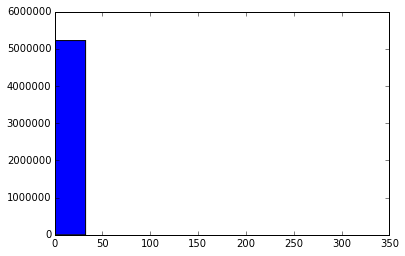

In [5]:
test=runoff*1e4;
plt.hist(test.flat)
runoff.shape

In [6]:
nav_lon[-1, ::30]

array([-114.35292053, -120.68655396, -127.11223602, -133.72366333,
       -140.62887573, -147.93199158, -155.71646118, -164.02655029,
       -172.84693909,  177.91372681,  168.42410278,  158.90687561,
        149.59405518,  140.67807007,  132.27964783,  124.44076538,
        117.13630676,  110.29226685,  103.80119324], dtype=float32)

# Plot the model grid

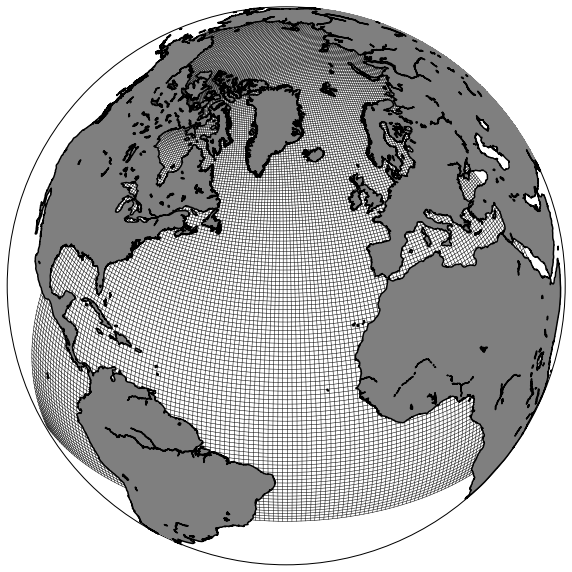

In [7]:
fig=plt.figure(figsize=(10, 10))
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon[::4, ::4], nav_lat[::4, ::4])
proj.plot(x[:, :].T, y[:, :].T, color='k', linewidth=0.5);
proj.plot(x[:, :], y[:, :], color='k', linewidth=0.5);

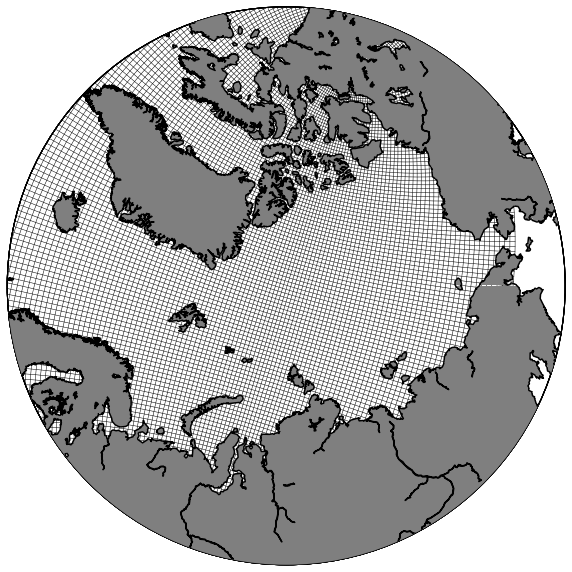

In [8]:
fig=plt.figure(figsize=(10, 10))
proj=Basemap(projection='npstere', resolution='l', \
    boundinglat=60, lon_0=90, round=True)
ax=plt.gca()
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon[::4, ::4], nav_lat[::4, ::4])
proj.plot(x[:, :].T, y[:, :].T, color='k', linewidth=0.5);
proj.plot(x[:, :], y[:, :], color='k', linewidth=0.5);

# Annual mean runoff

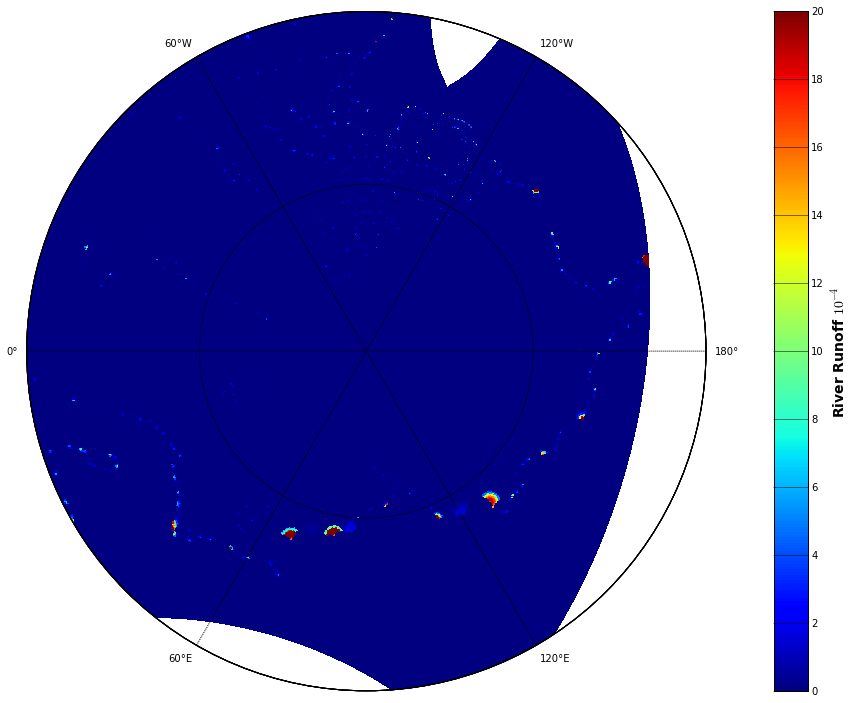

In [9]:
clev=np.arange(0, 20, 1)
CMap=cm.GMT_no_green
CMap.set_under('w')
#
fig=plt.figure(figsize=(14, 14))
proj=Basemap(projection='npstere', resolution='l', \
    boundinglat=60, lon_0=90, round=True)
ax=plt.gca()
parallels=np.arange(-90, 90, 15)
meridians=np.arange(0, 360, 60)
proj.drawparallels(parallels, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
proj.drawmeridians(meridians, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
#proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
#proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)
CS=proj.pcolor(x, y, np.mean(runoff, 0)*1e4, vmin=0, vmax=20)
CBar=proj.colorbar(CS, location='right', size='5%', pad='10%')
CBar.set_label('River Runoff $\mathrm{10^{-4}}$', fontsize=14, fontweight='bold')
CBar.ax.tick_params(axis='y', length=35)

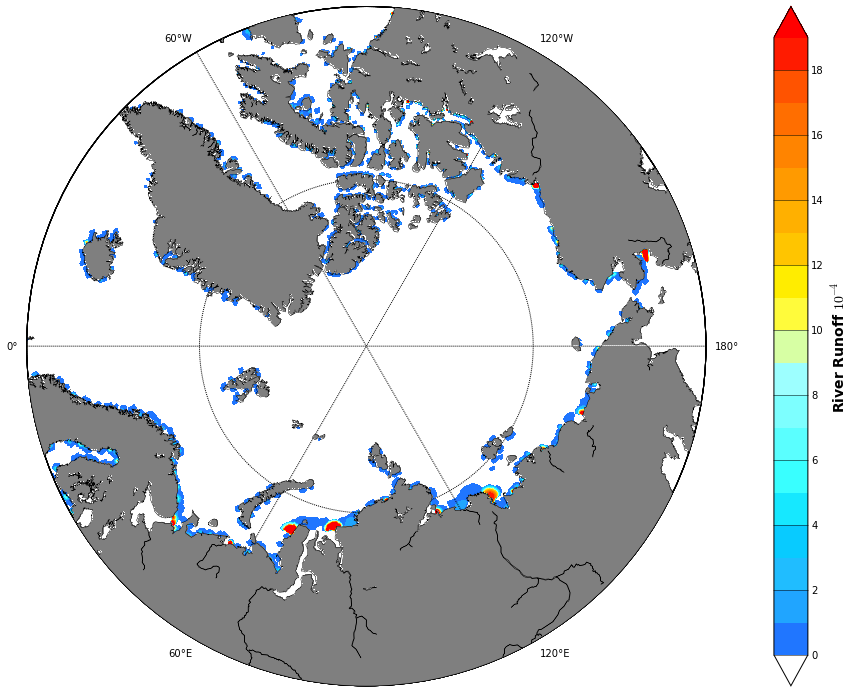

In [10]:
fig=plt.figure(figsize=(14, 14))
proj=Basemap(projection='npstere', resolution='l', \
    boundinglat=60, lon_0=90, round=True)
ax=plt.gca()
parallels=np.arange(-90, 90, 15)
meridians=np.arange(0, 360, 60)
proj.drawparallels(parallels, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
proj.drawmeridians(meridians, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
proj.drawcoastlines(linewidth=0.5, linestyle='-', color='k', zorder=3)
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, np.mean(runoff, 0)*1e4, clev, cmap=CMap, extend='both') # RdBu_r
#proj.contour(x, y, np.mean(runoff, 0)*1e4, clev, colors='k', linewidths=0.5)
CBar=proj.colorbar(CS, location='right', size='5%', pad='10%')
CBar.set_label('River Runoff $\mathrm{10^{-4}}$', fontsize=14, fontweight='bold')
CBar.ax.tick_params(axis='y', length=35)

# Seasonal variation

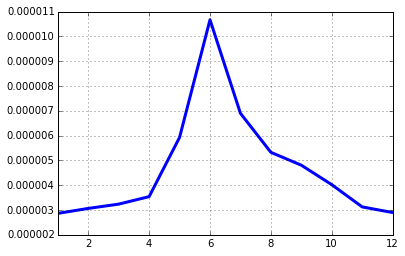

In [11]:
plt.plot(np.arange(1, 13, 1), np.mean(np.mean(runoff, 1), 1), linewidth=3)
ax=plt.gca()
ax.set_xlim(1, 12)
plt.grid()

# Compare with NCEP/NCAR Reanalysis total runoff

In [12]:
NCEP_name=glob.glob('_data/Reanalysis/runof.sfc.mon.ltm.nc')
print("found file: \n{}".format(NCEP_name))
NCEP_obj=nc.Dataset(NCEP_name[0])
print('Variables in {}:\n==========\n{}'.format(NCEP_name[0], NCEP_obj.variables.keys()))

found file: 
['_data/Reanalysis/runof.sfc.mon.ltm.nc']
Variables in _data/Reanalysis/runof.sfc.mon.ltm.nc:
[u'lat', u'lon', u'time', u'climatology_bounds', u'runof', u'valid_yr_count']


In [13]:
lonx=NCEP_obj.variables['lon'][:]
laty=NCEP_obj.variables['lat'][:]
NCEPrunoff=NCEP_obj.variables['runof'][:]
NCEP_obj.variables['runof'].units

u'kg/m^2'

In [14]:
longitude, latitude = np.meshgrid(lonx, laty)
longitude.shape

(94L, 192L)

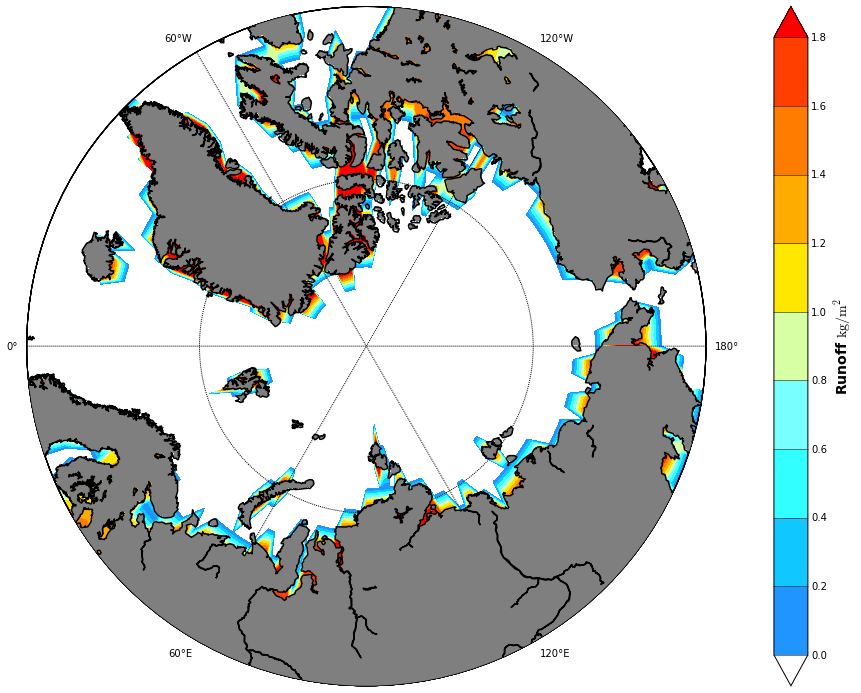

In [15]:
clev=np.arange(0, 2, 0.2)
CMap=cm.GMT_no_green
CMap.set_under('w')
#
fig=plt.figure(figsize=(14, 14))
proj=Basemap(projection='npstere', resolution='l', \
    boundinglat=60, lon_0=90, round=True)
ax=plt.gca()
parallels=np.arange(-90, 90, 15)
meridians=np.arange(0, 360, 60)
proj.drawparallels(parallels, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
proj.drawmeridians(meridians, labels=[1, 1, 1, 1],\
                    fontsize=10, latmax=90)
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(longitude, latitude)
CS=proj.contourf(x, y, np.mean(NCEPrunoff, 0), clev, cmap=CMap, extend='both') # RdBu_r
#proj.contour(x, y, np.mean(runoff, 0)*1e4, clev, colors='k', linewidths=2.0)
CBar=proj.colorbar(CS, location='right', size='5%', pad='10%')
CBar.set_label('Runoff $\mathrm{kg/m^2}$', fontsize=14, fontweight='bold')
CBar.ax.tick_params(axis='y', length=35)

# Reproject Xianming's Runoff file

In [16]:
ANHA4_name=glob.glob('_data/NEMO/ANHA4_runoff_monthly_DaiTrenberth_fewPTs.nc')
ANH4_obj=nc.Dataset(ANHA4_name[0])
#ANHA4_name

In [17]:
ANH4_lon=ANH4_obj.variables['nav_lon'][:]
ANH4_lat=ANH4_obj.variables['nav_lat'][:]
ANH4_rf=ANH4_obj.variables['runoff'][:]

In [18]:
ANH4_lon.shape

(800L, 544L)

In [29]:
coordinate_name=glob.glob('_data/NEMO/ORCA2_INPUT/coordinates*.nc')
print("found file: \n{}".format(coordinate_name))
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

found file: 
['_data/NEMO/ORCA2_INPUT\\coordinates.nc']


In [30]:
# allocate the memory
ANH4_rf_repj=np.zeros([12, np.size(nav_lon, 0), np.size(nav_lon, 1)])
for i in range(12):
    ANH4_rf_repj[i, :, :]=Nts.reporj_NEMOgrid(ANH4_lon, ANH4_lat, ANH4_rf[i, :, :], nav_lon, nav_lat, method='linear')

In [31]:
ANH4_rf_repj.shape

(12L, 149L, 182L)

In [32]:
print('max: {}'.format(np.nanmax(ANH4_rf_repj)))
#ANH4_rf_repj=ANH4_rf_repj*1e4

max: 0.00706651618203


In [33]:
ANH4_rf_repj.shape

(12L, 149L, 182L)

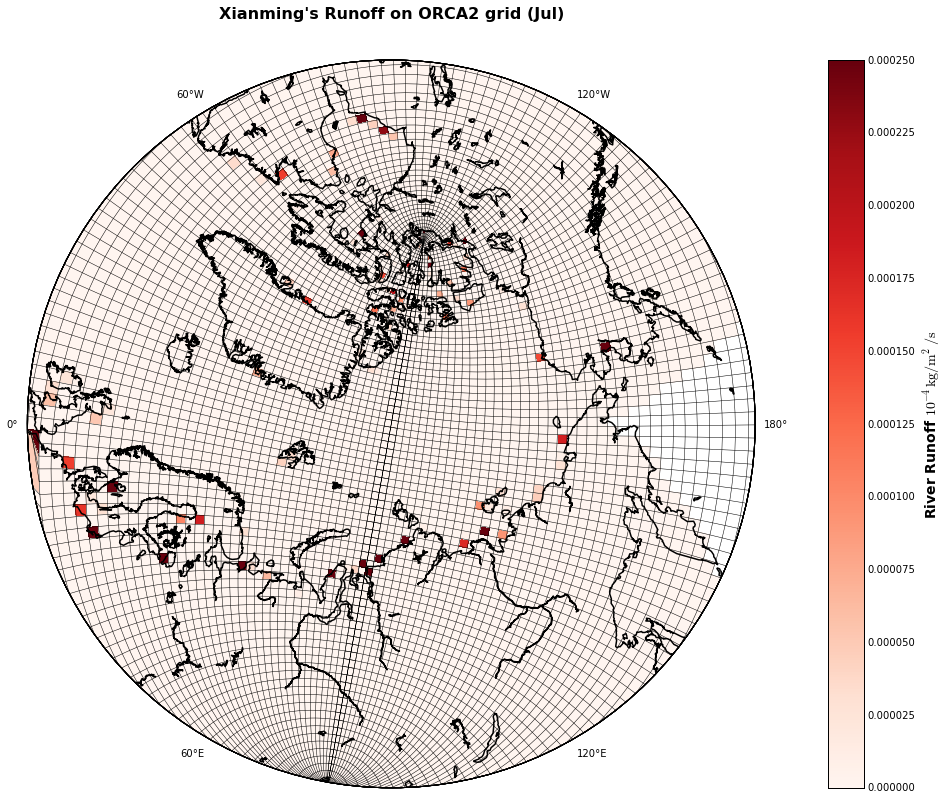

In [35]:
CMap=plt.cm.Reds #cm.GMT_seis_r
var_name='River Runoff $\mathrm{10^{-4} kg/m^2/s}$'
rf_id_interp_masked=np.ma.masked_where(np.isnan(ANH4_rf_repj[7, :, :]), ANH4_rf_repj[7, :, :])
#
fig, ax, proj = Nts.pcolor_Arctic(nav_lon, nav_lat, 50, rf_id_interp_masked, [0, 2.5e-4], CMap, var_name, hit=0)
#
title="Xianming's Runoff on ORCA2 grid (Jul)"
ax.set_title(title, fontsize=16, fontweight='bold', y=1.05)
fig.set_size_inches(15, 15)
#
#proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)
#proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
#
x, y=proj(nav_lon, nav_lat)
proj.plot(x.T, y.T, color='k', linewidth=0.5)
proj.plot(x, y, color='k', linewidth=0.5)
fig.canvas.draw()

In [37]:
scipy.io.savemat('_data/Exchange/Xianming_runoff.mat', {'nav_lon': nav_lon, 'nav_lat': nav_lat, 'runoff': ANH4_rf_repj})